# <span style="color:silver ; font-size:35 ; font-family:Times New Roman">WBAAC.com - NISSAN  | Linear Regression</span>
<br />

## <span style="color:Silver ; font-family:Times New Roman">Importing Packages and Data</span>

In [1]:
### Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
import statsmodels.tools
import import_ipynb
import datetime

importing Jupyter notebook from 0-EDA.ipynb
Fuel: ['Diesel' 'Petrol' nan 'Petrol Hybrid' 'Electric']

Name: ['juke' 'leaf' 'micra' 'navara' 'qashqai' 'x-trail']

Transmission: ['Manual' 'Automatic' nan]

Body: ['SUV' 'Hatchback' nan 'Pickup' 'MPV' 'Estate']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15165 entries, 0 to 15164
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          15165 non-null  object  
 1   name          15165 non-null  category
 2   price         15165 non-null  int32   
 3   mileage       15164 non-null  Int32   
 4   BHP           1794 non-null   float64 
 5   transmission  15156 non-null  category
 6   fuel          15164 non-null  category
 7   owners        5087 non-null   Int32   
 8   body          15108 non-null  category
 9   ULEZ          12103 non-null  object  
 10  engine        14117 non-null  float64 
 11  year          14876 non-null  Int32   
 12  reg        

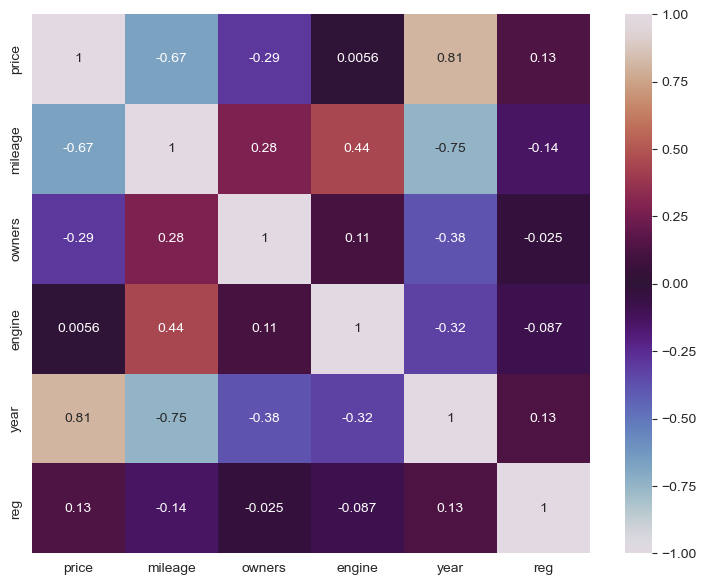

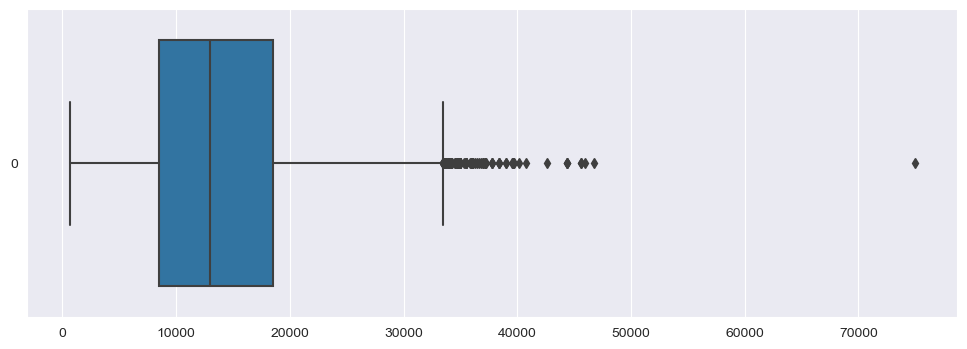

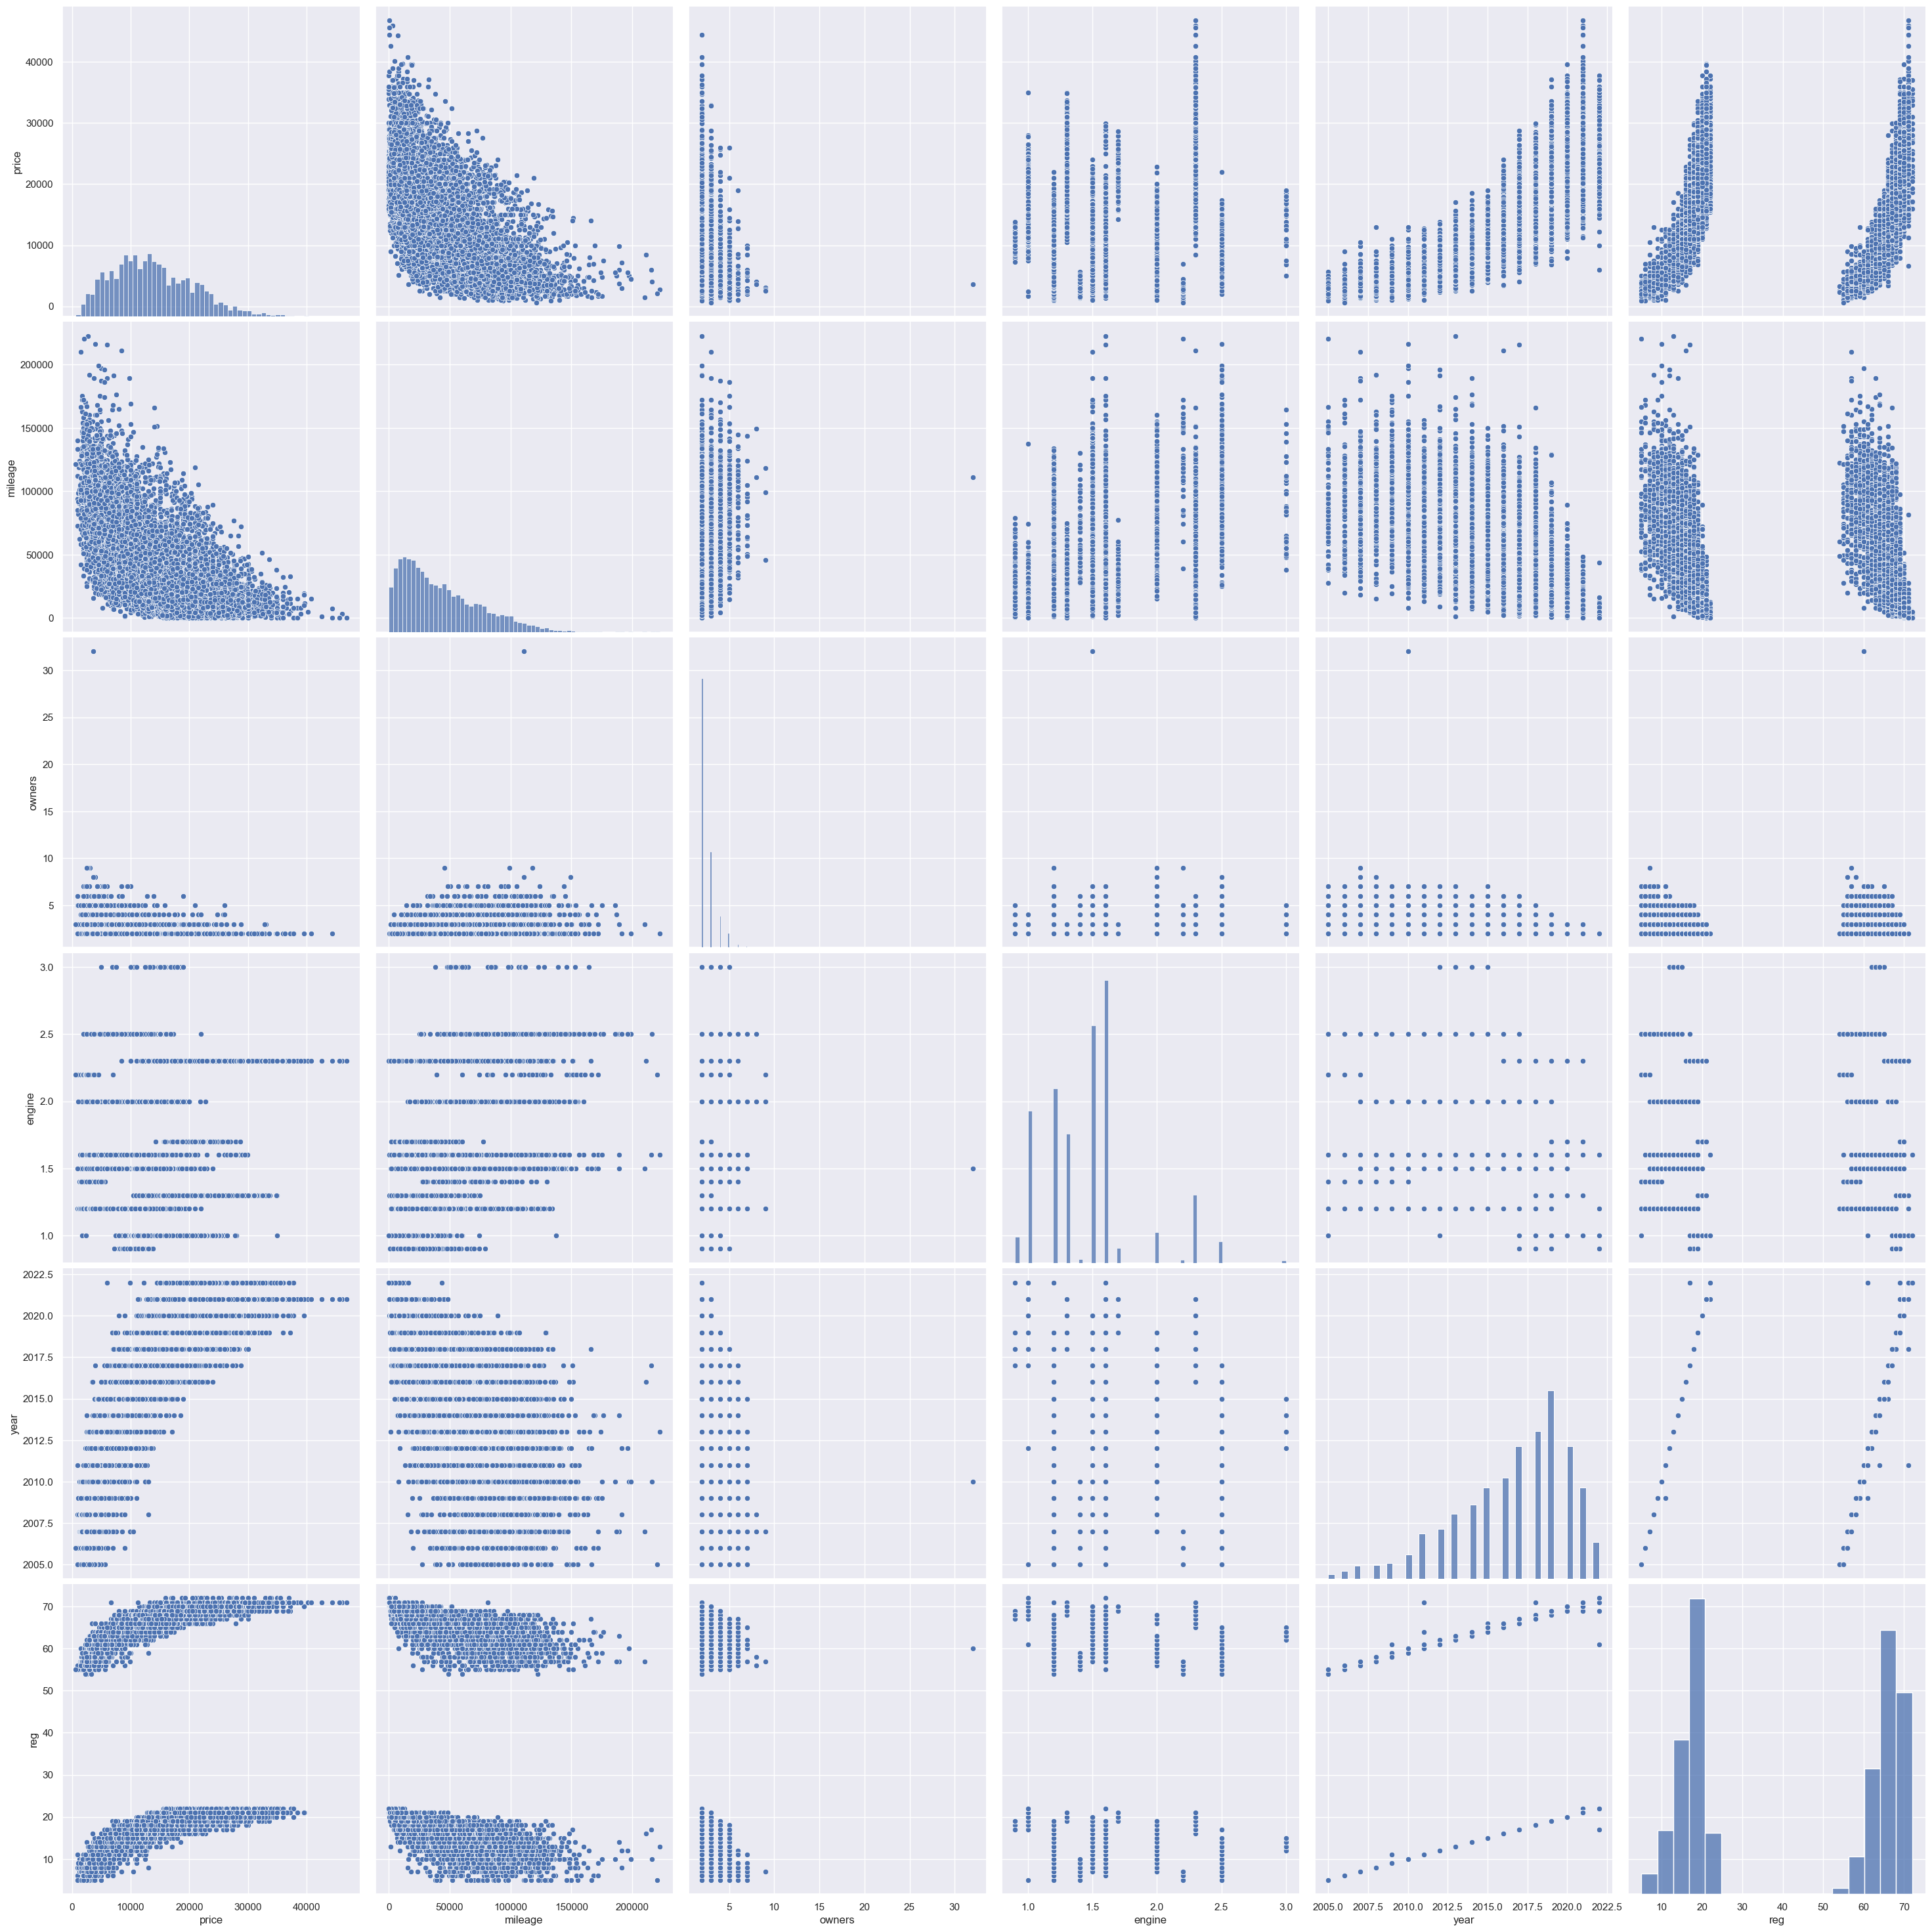

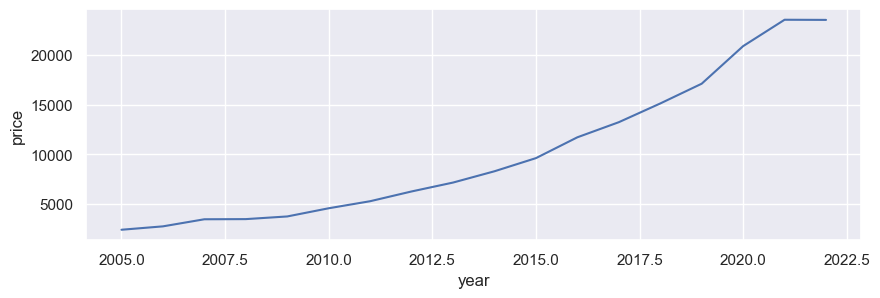

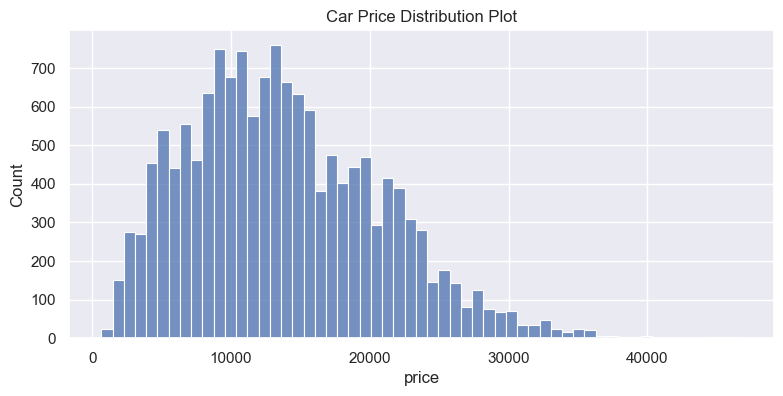

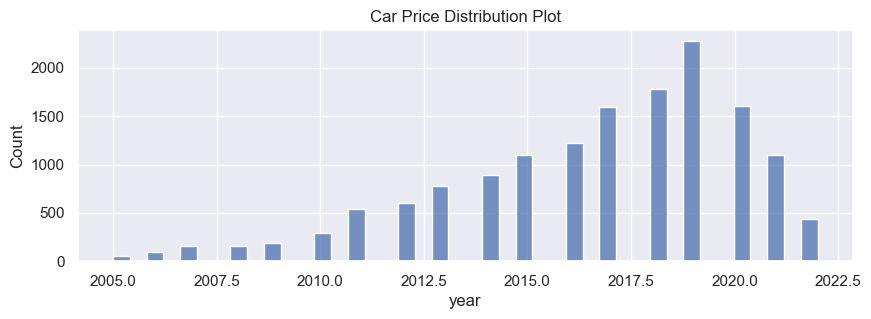

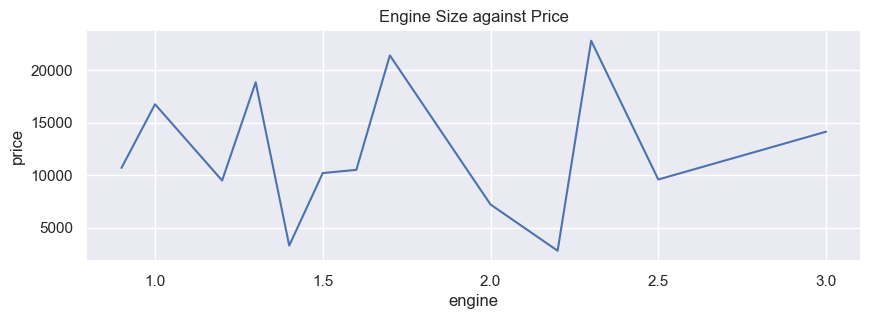

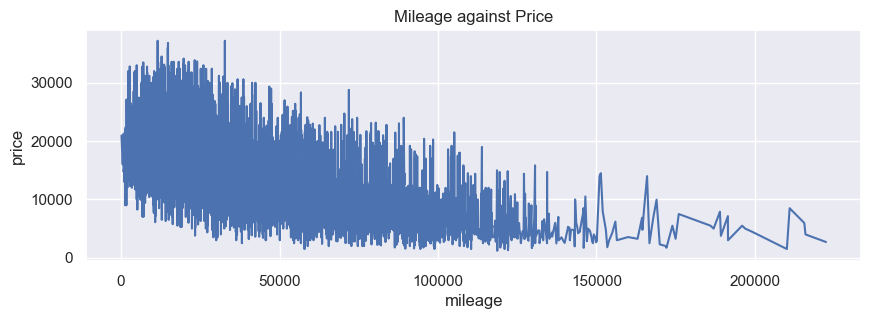

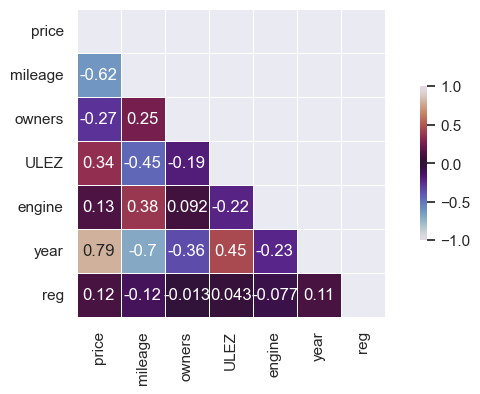

''

In [2]:
## Restart Kernel if '0-EDA' module not found - may need to pip install import_ipynb
eda = __import__('0-EDA')

In [3]:
# Our data set is eda.df_model
print(eda.df_model.head())
print("\n", eda.df_model.shape)

     make  name  price  mileage transmission    fuel body  ULEZ  engine  year
0  nissan  juke   2999   116000       Manual  Diesel  SUV     0     1.5  2010
1  nissan  juke   3790    80000       Manual  Diesel  SUV     0     1.5  2010
2  nissan  juke   5950    82000    Automatic  Petrol  SUV     1     1.6  2010
3  nissan  juke   6499    35000    Automatic  Petrol  SUV     1     1.6  2010
4  nissan  juke   3495   118000       Manual  Petrol  SUV     1     1.6  2010

 (13018, 10)


<br /> <br />
# <span style="color:silver ; font-family:Times New Roman">Model Function</span>
<br />

In [4]:
### df3: Dataframe Before Model - making copy of df_model
df3 = eda.df_model.copy()


In [5]:
### Train / Test Splitting
feature_cols = list(df3.columns)        ## Columns from Dataframe set to Feature Columns for Model Testing
feature_cols.remove('price')            ## Removing the dependent variable, price

X = df3[feature_cols]
y = df3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)  ## Splitting Dataframe data into separate train and test dataframes



In [6]:
### Feature Engineering Function

# Non-numeric columns are One-Hot Encoded


def feature_eng(df):
    ''' Feature Engineer Function - One Hot encoding of name, transmission, fuel, ULEZ and body'''
    df = pd.get_dummies(df, columns = ['name'], drop_first = True, prefix = 'name')
    df = pd.get_dummies(df, columns = ['transmission'], drop_first = True, prefix = 'transmission')
    df = pd.get_dummies(df, columns = ['fuel'], drop_first = True, prefix = 'fuel')
    df = pd.get_dummies(df, columns = ['ULEZ'], drop_first = True, prefix = 'ULEZ')
    df = pd.get_dummies(df, columns = ['body'], drop_first = True, prefix = 'body')
    df['age'] = datetime.date.today().year - df['year']           ## Setting year to age to complete initial scale of the year of manufacture
    df['age_log'] =  np.log(df['age'])      ## logging the age as age and price followed a logarithmic relationship
    df = sm.add_constant(df)
    return df

In [7]:
## Apply feature engineering function X_Train Dataframe
X_train = feature_eng(X_train)

In [8]:
## Scale mileage and age_log using MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(X_train[['mileage', 'age_log']])         ## Fitting the model to X-train data
X_train[['mileage', 'age_log']] = scaler.transform(X_train[['mileage', 'age_log']])     ## Transforming the X_train mileage and age_log values
scaler.scale_       ## Scaling factors to be implemented in the function


array([7.69941484e-06, 4.96301802e-01])

In [9]:
X_train

,const,make,mileage,engine,year,name_leaf,name_micra,name_navara,name_qashqai,name_x-trail,...,fuel_Electric,fuel_Petrol,fuel_Petrol Hybrid,ULEZ_1,body_Hatchback,body_MPV,body_Pickup,body_SUV,age,age_log
480,1.0,nissan,0.407145,1.6,2013,0,0,0,0,0,...,0,1,0,1,0,0,0,1,9,0.746476
12196,1.0,nissan,0.599199,1.5,2019,0,0,0,1,0,...,0,0,0,1,0,0,0,1,3,0.201233
13537,1.0,nissan,0.107761,1.3,2020,0,0,0,1,0,...,0,1,0,1,0,0,0,1,2,0.000000
11526,1.0,nissan,0.066646,1.2,2018,0,0,0,1,0,...,0,1,0,1,0,0,0,1,4,0.344010
6560,1.0,nissan,0.130852,1.0,2019,0,1,0,0,0,...,0,1,0,1,1,0,0,0,3,0.201233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13615,1.0,nissan,0.185071,1.3,2020,0,0,0,1,0,...,0,1,0,1,0,0,0,1,2,0.000000
6286,1.0,nissan,0.136149,0.9,2018,0,1,0,0,0,...,0,1,0,1,1,0,0,0,4,0.344010
6490,1.0,nissan,0.264806,1.0,2019,0,1,0,0,0,...,0,1,0,1,1,0,0,0,3,0.201233
875,1.0,nissan,0.556175,1.5,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,1,8,0.688020


In [10]:
### Linear Regression
feature_cols = ['const', 'mileage', 'age_log', 'name_leaf',
                'name_micra', 'name_navara', 'name_qashqai',
                'name_x-trail', 'transmission_Manual', 'ULEZ_1']        ## Final Features to be used in the model


lin_reg = sm.OLS(y_train, X_train[feature_cols].astype(float))          ## Stats Model Linear Regression
results = lin_reg.fit()
print(results.summary())


X_train['y_pred'] = results.predict(X_train[feature_cols])
X_train['y_pred'] = X_train['y_pred'].astype('float')
rmse = statsmodels.tools.eval_measures.rmse(y_train, X_train['y_pred']) ## RMSE of the Model

print('\n', 'Rmse: ', rmse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.205e+04
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:42:46   Log-Likelihood:                -92789.
No. Observations:               10414   AIC:                         1.856e+05
Df Residuals:                   10404   BIC:                         1.857e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.026e+04    

In [11]:
### VIF
def checkVIF(X):
    '''Function to calculate the VIF of a dataframe '''
    vif = pd.DataFrame()                ## Initialising an empty dataframe
    vif['Features'] = feature_cols      ## The features used in training
    vif['VIF'] = [variance_inflation_factor(X[feature_cols].values, i) for i in range(X[feature_cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)   ## Round VIF to 2 decimal places for readability
    vif = vif.sort_values(by = "VIF", ascending = False)    ## Sorting VIF values in descending order to observe feature VIF scores
    return vif
checkVIF(X_train)   ## If VIF >= 5, test to see if the removal of said feature reduces the multi-co-linearity

,Features,VIF
0,const,28.36
1,mileage,2.38
2,age_log,2.27
6,name_qashqai,1.50
3,name_leaf,1.34
9,ULEZ_1,1.31
5,name_navara,1.30
4,name_micra,1.29
8,transmission_Manual,1.29
7,name_x-trail,1.19


In [12]:
##### Testing Linear Model on the Test data #####
X_test = feature_eng(X_test)        ## Feature engineer test data using same function as train data
X_test = X_test[feature_cols]
X_test[['mileage', 'age_log']] = scaler.transform(X_test[['mileage', 'age_log']])## Scale test data

X_test['y_pred'] = results.predict(X_test)
rmse = statsmodels.tools.eval_measures.rmse(y_test, X_test['y_pred'])
print(f' X-Test RMSE: {rmse}')                         ## RMSE for test data

 X-Test RMSE: 1756.2837189902239


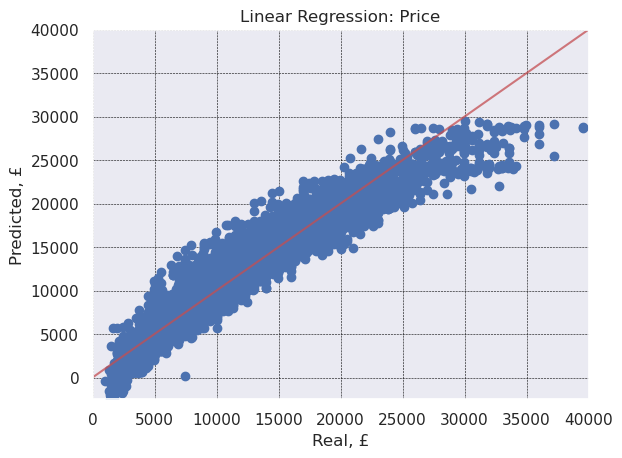

In [13]:
##### Plot of Train Data real price and predicted price(y_pred) #####
X_train['price'] = df3['price']
fig, ax = plt.subplots()

### Plotting Data
plt.scatter((X_train['price']) , (X_train['y_pred']))

### Plotting X = Y
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'r', alpha=0.75, zorder=2)

### Formatting
plt.style.use('default')
plt.xlabel('Real, £')
plt.ylabel('Predicted, £')
plt.title('Linear Regression: Price')
plt.xlim([0,40000])
plt.ylim([-2500, 40000])
plt.grid(color = 'black', linestyle = '--', linewidth = 0.4)
plt.show()